处理骤旱结果

1.计算骤旱频率变化=============================

In [15]:
area_change=function(file_name,lonlat_name,save_name){
load(file_name)
load(lonlat_name)
year=1981:2020
occ_fre = colSums(occ_number, na.rm = T)    #骤旱的持续时间
#to_raster(occ_dur  ,  filename = "occ_dur_Christian")
occ_fre <- data.frame(year,occ_fre)
#计算年际变化率
change_fun <- function(i,data){
  x=data[i,2]
  y=data[i+1,2]
  z=((y-x)*100)/x
  return(z)
}
change_data <- NULL
for(i in 1:39){
  change_data[i+1]<- change_fun(i,occ_fre)
  #print(paste0("OK_",i))
}
occ_fre$change <- change_data
colnames(occ_fre) <- c("year","fre","change") 
save(occ_fre,file = save_name)
return(occ_fre)
}


In [ ]:
#ERA5-LAND-0.5
file_name = "E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData"
lonlat_name="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
save_name="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_fre.RData"

#GLEAM-0.25
file_name2="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\fd_result6\\fd_characteristics_detrend.RData"
lonlat_name2="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\grid_lon_lat.RData"
save_name2="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\fd_result6\\occ_fre.RData"

#GLEAM-0.5
file_name3="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData"
lonlat_name3="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
save_name3="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_fre.RData"

#ERA5-0.5
file_name4="E:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData"
lonlat_name4="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
save_name4="E:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_fre.RData"

#GEE5
file_name5="E:\\NO.1 flash drought\\03data\\data_GEE5\\fd_characteristics_detrend.RData"
lonlat_name5="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
save_name5="E:\\NO.1 flash drought\\03data\\data_GEE5\\occ_fre.RData"

#area_change(file_name,lonlat_name,save_name)
#area_change(file_name2,lonlat_name2,save_name2)(年数不同)
area_change(file_name5,lonlat_name5,save_name5)


In [ ]:
#GLEAM-0.25
file_name="H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\fd_result6\\fd_characteristics_detrend.RData"
lonlat_name="H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\grid_lon_lat.RData"
save_name="H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\fd_result6\\occ_fre.RData"

area_change=function(file_name,lonlat_name,save_name){
  load(file_name)
  load(lonlat_name)
  year=1980:2020
  occ_fre = colSums(occ_number, na.rm = T)    #骤旱的持续时间
  #to_raster(occ_dur  ,  filename = "occ_dur_Christian")
  occ_fre <- data.frame(year,occ_fre)
  #计算年际变化率
  change_fun <- function(i,data){
    x=data[i,2]
    y=data[i+1,2]
    z=((y-x)*100)/x
    return(z)
  }
  change_data <- NULL
  for(i in 1:40){
    change_data[i+1]<- change_fun(i,occ_fre)
    #print(paste0("OK_",i))
  }
  occ_fre$change <- change_data
  colnames(occ_fre) <- c("year","fre","change") 
  save(occ_fre,file = save_name)
  return(occ_fre)
}

1.1计算分区频率变化

In [1]:
#load("H:\\NO.1 flash drought\\03data\\data_GEE5\\fd_characteristics_detrend.RData")
load("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\fd_result6\\fd_characteristics_detrend.RData")
#load("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData")
#load("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData")
#load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData")
#load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")
load("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\grid_lon_lat.RData")
year=1981:2020
 data <- data.frame(grid2,occ_number)
 #ymin=31.5;ymax =41.5 ;xmin =-123.9 ;xmax =-96.1 
 
frequency_change=function(xmin,xmax,ymin,ymax,j){
  data1 <- data[data$lon>(xmin) & data$lon<(xmax) & data$lat>(ymin) & data$lat<(ymax),c(-2:-1)]
  occ_fre = colSums(data1, na.rm = T)    #骤旱的持续时间
  #to_raster(occ_dur  ,  filename = "occ_dur_Christian")
  occ_fre <- data.frame(year,occ_fre)
  #计算年际变化率
  change_fun <- function(i,data){
    x=data[i,2]
    y=data[i+1,2]
    z=((y-x)*100)/x
    return(z)
  }
  change_data <- NULL
  for(i in 1:39){
    change_data[i+1]<- change_fun(i,occ_fre)
    #print(paste0("OK_",i))
  }
  occ_fre$change <- change_data
  colnames(occ_fre) <- c("year","fre","change") 
  #save(occ_fre,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_fre",j,".RData"))
  #save(occ_fre,file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_fre",j,".RData"))
  #save(occ_fre,file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_fre",j,".RData"))
  save(occ_fre,file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\fd_result6\\occ_fre",j,".RData"))
  return(j)
}


In [2]:
frequency_change(ymin=31.5,ymax =41.5 ,xmin =-123.9 ,xmax =-96.1 ,1)
frequency_change(ymin=16.7,ymax =26 ,xmin =-106.5 ,xmax =-96.5 ,2)
frequency_change(ymin=-22.4,ymax =-3.8 ,xmin =-48 ,xmax =-34.9 ,3)
frequency_change(ymin=-30.1,ymax =-13.9 ,xmin =-75.2 ,xmax =-65.5 ,4)
frequency_change(ymin=36.1,ymax =44.6 ,xmin =-8.6 ,xmax =-0.8 ,5)
frequency_change(ymin=17.5,ymax =34.5 ,xmin =-17.2 ,xmax =32.7 ,6)
frequency_change(ymin=-7.6,ymax =10.8 ,xmin =30.5 ,xmax =42.1 ,7)
frequency_change(ymin=-20.5,ymax =-13.8 ,xmin =11.6 ,xmax =35.9 ,8)
frequency_change(ymin=12.3,ymax =37.1 ,xmin =36 ,xmax =68.1 ,9)
frequency_change(ymin=27.5,ymax =40.7 ,xmin =77.4 ,xmax =101 ,10)
frequency_change(ymin=6.5,ymax =26.1 ,xmin =71.7 ,xmax =88.1 ,11)
frequency_change(ymin=-19.3,ymax =-10.8 ,xmin =127.3 ,xmax =145.5 ,12)

ERROR: Error in data.frame(year, occ_fre): 参数值意味着不同的行数: 40, 41


1.2 计算分区频率变化（综合结果)

In [ ]:
load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_fre",1,".RData"))
occ_fre
  aa=occ_fre[,3]
  aa

In [32]:
#统计年变化   
fun=function(j){
  #load(file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount",j,".RData"))
  load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_fre",j,".RData"))
  aa=occ_fre[,3]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_fre",j,".RData"))
  bb=occ_fre[,3]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_fre",j,".RData"))
  cc=occ_fre[,3]

load(file="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")

fd_data <- data.frame(aa,bb,cc)
fd_data$MEAN <- apply(fd_data,1,mean,na.rm=T)
fd_data$SD <- apply(fd_data[,1:3],1,sd,na.rm=T)
fd_data$CV <- (fd_data$SD/fd_data$MEAN)

save(fd_data,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_fre\\occ_fre_sd_cv",j,".RData"))
return(j)
}
sapply(1:12,fun)

[1]  1  2  3  4  5  6  7  8  9 10 11 12

In [35]:
#统计年频率   
fun=function(j){
  #load(file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount",j,".RData"))
  load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_fre",j,".RData"))
  aa=occ_fre[,2]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_fre",j,".RData"))
  bb=occ_fre[,2]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_fre",j,".RData"))
  cc=occ_fre[,2]

load(file="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")

fd_data <- data.frame(aa,bb,cc)
fd_data$MEAN <- apply(fd_data,1,mean,na.rm=T)
fd_data$SD <- apply(fd_data[,1:3],1,sd,na.rm=T)
fd_data$CV <- (fd_data$SD/fd_data$MEAN)

save(fd_data,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_fre\\occ_fre_sd_cv_2_",j,".RData"))
return(j)
}
sapply(1:12,fun)

[1]  1  2  3  4  5  6  7  8  9 10 11 12

1.3计算全球（综合结果）

In [36]:
#统计年变化   
#fun=function(j){
  #load(file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount",j,".RData"))
  load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_fre",".RData"))
  aa=occ_fre[,3]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_fre",".RData"))
  bb=occ_fre[,3]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_fre",".RData"))
  cc=occ_fre[,3]

load(file="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")

fd_data <- data.frame(aa,bb,cc)
fd_data$MEAN <- apply(fd_data,1,mean,na.rm=T)
fd_data$SD <- apply(fd_data[,1:3],1,sd,na.rm=T)
fd_data$CV <- (fd_data$SD/fd_data$MEAN)

save(fd_data,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_fre\\occ_fre_sd_cv",".RData"))
# return(j)
# }
# sapply(1:12,fun)

In [37]:
#统计年频率   
#fun=function(j){
  #load(file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount",j,".RData"))
  load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_fre",".RData"))
  aa=occ_fre[,2]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_fre",".RData"))
  bb=occ_fre[,2]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_fre",".RData"))
  cc=occ_fre[,2]

load(file="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")

fd_data <- data.frame(aa,bb,cc)
fd_data$MEAN <- apply(fd_data,1,mean,na.rm=T)
fd_data$SD <- apply(fd_data[,1:3],1,sd,na.rm=T)
fd_data$CV <- (fd_data$SD/fd_data$MEAN)

save(fd_data,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_fre\\occ_fre_sd_cv_2",".RData"))
# return(j)
# }
# sapply(1:12,fun)

2.计算面积变化======================================

In [20]:
area_change=function(file_name,lonlat_name,save_name){
load(file_name)
load(lonlat_name)
load("E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\lon_lat_area.RData")  #0.5格点的面积
#occ_total = rowSums(occ_number, na.rm = T)
dat = data.frame(x=grid2$lon, y=grid2$lat, z= occ_number)#[(720*5*18+1):(720*5*19)]
names(dat)=c("lon","lat")
#data <- dat[-which(dat$occ_number==0),]
result <- merge(dat,lon_lat_area,by=c("lon","lat")) 

fun_area <- function(data){
  data2 <- data[,3:42]*data[,43]
  return(data2)
}
aa <- fun_area(result)
occ_area = colSums(aa, na.rm = T)#每年发生骤旱的面积
year=1981:2020

occ_area <- data.frame(year,occ_area)

#计算年际变化率
change_fun <- function(i,data){
  x=data[i,2]
  y=data[i+1,2]
  z=((y-x)*100)/x
  return(z)
}


change_data <- NULL
for(i in 1:39){
  change_data[i+1]<- change_fun(i,occ_area)
  #print(paste0("OK_",i))
}

occ_area$change <- change_data

colnames(occ_area) <- c("year","area","change")  
save(occ_area,file = save_name)
return(occ_area)
}


In [ ]:
#ERA5-LAND-0.5
file_name = "E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData"
lonlat_name="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
save_name="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_area.RData"

#GLEAM-0.25
file_name2="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\fd_result6\\fd_characteristics_detrend.RData"
lonlat_name2="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\grid_lon_lat.RData"
save_name2="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\fd_result6\\occ_area.RData"

#GLEAM-0.5
file_name3="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData"
lonlat_name3="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
save_name3="E:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_area.RData"

#ERA5-0.5
file_name4="E:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData"
lonlat_name4="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
save_name4="E:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_area.RData"

#GEE5
file_name5="E:\\NO.1 flash drought\\03data\\data_GEE5\\fd_characteristics_detrend.RData"
lonlat_name5="E:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
save_name5="E:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area.RData"

#area_change(file_name,lonlat_name,save_name)
#area_change(file_name2,lonlat_name2,save_name2)(年数不同)
#area_change(file_name3,lonlat_name3,save_name3)
area_change(file_name4,lonlat_name4,save_name4)
#area_change(file_name5,lonlat_name5,save_name5)


2.1计算分区的面积变化

In [9]:
load("H:\\NO.1 flash drought\\03data\\data_GEE5\\fd_characteristics_detrend.RData")
load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")
load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\lon_lat_area.RData")  #0.5格点的面积

area_change=function(xmin,xmax,ymin,ymax,j){
  #occ_total = rowSums(occ_number, na.rm = T)
  dat = data.frame(x=grid2$lon, y=grid2$lat, z= occ_number)#[(720*5*18+1):(720*5*19)]
  names(dat)=c("lon","lat")
  #data <- dat[-which(dat$occ_number==0),]
  data <- merge(dat,lon_lat_area,by=c("lon","lat")) 
  data1 <- data[data$lon>(xmin) & data$lon<(xmax) & data$lat>(ymin) & data$lat<(ymax),]
  
  fun_area <- function(data){
    data2 <- data[,3:42]*data[,43]
    return(data2)
  }
  aa <- fun_area(data1)
  occ_area = colSums(aa, na.rm = T)#每年发生骤旱的面积
  year=1981:2020
  
  occ_area <- data.frame(year,occ_area)
  
  #计算年际变化率
  change_fun <- function(i,data){
    x=data[i,2]
    y=data[i+1,2]
    z=((y-x)*100)/x
    return(z)
  }
  
  
  change_data <- NULL
  for(i in 1:39){
    change_data[i+1]<- change_fun(i,occ_area)
    #print(paste0("OK_",i))
  }
  
  occ_area$change <- change_data
  
  colnames(occ_area) <- c("year","area","change")  
  save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area",j,".RData"))
  return(j)
}


In [ ]:
area_change(ymin=31.5,ymax =41.5 ,xmin =-123.9 ,xmax =-96.1 ,1)
area_change(ymin=16.7,ymax =26 ,xmin =-106.5 ,xmax =-96.5 ,2)
area_change(ymin=-22.4,ymax =-3.8 ,xmin =-48 ,xmax =-34.9 ,3)
area_change(ymin=-30.1,ymax =-13.9 ,xmin =-75.2 ,xmax =-65.5 ,4)
area_change(ymin=36.1,ymax =44.6 ,xmin =-8.6 ,xmax =-0.8 ,5)
area_change(ymin=17.5,ymax =34.5 ,xmin =-17.2 ,xmax =32.7 ,6)
area_change(ymin=-7.6,ymax =10.8 ,xmin =30.5 ,xmax =42.1 ,7)
area_change(ymin=-20.5,ymax =-13.8 ,xmin =11.6 ,xmax =35.9 ,8)
area_change(ymin=12.3,ymax =37.1 ,xmin =36 ,xmax =68.1 ,9)
area_change(ymin=27.5,ymax =40.7 ,xmin =77.4 ,xmax =101 ,10)
area_change(ymin=6.5,ymax =26.1 ,xmin =71.7 ,xmax =88.1 ,11)
area_change(ymin=-19.3,ymax =-10.8 ,xmin =127.3 ,xmax =145.5 ,12)

2.2计算面积占比

In [25]:
#分区

#load("H:\\NO.1 flash drought\\03data\\data_GEE5\\fd_characteristics_detrend.RData")
load("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData")
#load("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData")
#load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData")
load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")
load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\lon_lat_area.RData")  #0.5格点的面积
#ymin=31.5;ymax =41.5;xmin =-123.9;xmax =-96.1

area_change=function(xmin,xmax,ymin,ymax,j){
  #occ_total = rowSums(occ_number, na.rm = T)
  dat = data.frame(x=grid2$lon, y=grid2$lat, z= occ_number)#[(720*5*18+1):(720*5*19)]
  names(dat)=c("lon","lat")
  #data <- dat[-which(dat$occ_number==0),]
  data <- merge(dat,lon_lat_area,by=c("lon","lat")) 
  data1 <- data[data$lon>(xmin) & data$lon<(xmax) & data$lat>(ymin) & data$lat<(ymax),]
  
  #data=data1[1,3:42]
  fun <- function(data){
    data[-which(is.na(data))]=1 
    return(data)
  } 
  #fun(data)
  data2 <- apply(data1[,3:42],1,fun)
  #data3 <- data.frame(t(data2),data1[,43])
  data3 <- t(data2)*data1[,43]
  
  data4 <- apply(data3,2,sum,na.rm=T)
  data5 <-as.numeric((data4*100)/sum(data1[,43]))
  
  year=1981:2020
  
  occ_area <- data.frame(year,data5)
  
  #计算年际变化率
  change_fun <- function(i,data){
    x=data[i,2]
    y=data[i+1,2]
    z=((y-x)*100)/x
    return(z)
  }
  
  
  change_data <- NULL
  for(i in 1:39){
    change_data[i+1]<- change_fun(i,occ_area)
    #print(paste0("OK_",i))
  }
  
  occ_area$change <- change_data
  
  colnames(occ_area) <- c("year","area","change")  
  #save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount",j,".RData"))
  #save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_area_acount",j,".RData"))
  #save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_area_acount",j,".RData"))
  #save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_area_acount",j,".RData"))
  return(occ_area)
}



In [ ]:
area_change(ymin=31.5,ymax =41.5 ,xmin =-123.9 ,xmax =-96.1 ,1)
area_change(ymin=16.7,ymax =26 ,xmin =-106.5 ,xmax =-96.5 ,2)
area_change(ymin=-22.4,ymax =-3.8 ,xmin =-48 ,xmax =-34.9 ,3)
area_change(ymin=-30.1,ymax =-13.9 ,xmin =-75.2 ,xmax =-65.5 ,4)
area_change(ymin=36.1,ymax =44.6 ,xmin =-8.6 ,xmax =-0.8 ,5)
area_change(ymin=17.5,ymax =34.5 ,xmin =-17.2 ,xmax =32.7 ,6)
area_change(ymin=-7.6,ymax =10.8 ,xmin =30.5 ,xmax =42.1 ,7)
area_change(ymin=-20.5,ymax =-13.8 ,xmin =11.6 ,xmax =35.9 ,8)
area_change(ymin=12.3,ymax =37.1 ,xmin =36 ,xmax =68.1 ,9)
area_change(ymin=27.5,ymax =40.7 ,xmin =77.4 ,xmax =101 ,10)
area_change(ymin=6.5,ymax =26.1 ,xmin =71.7 ,xmax =88.1 ,11)
area_change(ymin=-19.3,ymax =-10.8 ,xmin =127.3 ,xmax =145.5 ,12)

In [44]:
#全球

#load("H:\\NO.1 flash drought\\03data\\data_GEE5\\fd_characteristics_detrend.RData")
#load("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData")
#load("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData")
load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData")
load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")
load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\lon_lat_area.RData")  #0.5格点的面积
#ymin=31.5;ymax =41.5;xmin =-123.9;xmax =-96.1

#area_change=function(xmin,xmax,ymin,ymax,j){
  #occ_total = rowSums(occ_number, na.rm = T)
  dat = data.frame(x=grid2$lon, y=grid2$lat, z= occ_number)#[(720*5*18+1):(720*5*19)]
  names(dat)=c("lon","lat")
  #data <- dat[-which(dat$occ_number==0),]
  data1 <- merge(dat,lon_lat_area,by=c("lon","lat")) 
  #data1 <- data[data$lon>(xmin) & data$lon<(xmax) & data$lat>(ymin) & data$lat<(ymax),]
  
  #data=data1[1,3:42]
  fun <- function(data){
    data[-which(is.na(data))]=1 
    return(data)
  } 
  #fun(data)
  data2 <- apply(data1[,3:42],1,fun)
  #data3 <- data.frame(t(data2),data1[,43])
  data3 <- t(data2)*data1[,43]
  
  data4 <- apply(data3,2,sum,na.rm=T)
  data5 <-as.numeric((data4*100)/sum(data1[,43]))
  
  year=1981:2020
  
  occ_area <- data.frame(year,data5)
  
  #计算年际变化率
  change_fun <- function(i,data){
    x=data[i,2]
    y=data[i+1,2]
    z=((y-x)*100)/x
    return(z)
  }
  
  
  change_data <- NULL
  for(i in 1:39){
    change_data[i+1]<- change_fun(i,occ_area)
    #print(paste0("OK_",i))
  }
  
  occ_area$change <- change_data
  
  colnames(occ_area) <- c("year","area","change")  
  #save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount",j,".RData"))
  #save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_area_acount",".RData"))
  #save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_area_acount",".RData"))
  save(occ_area,file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_area_acount",".RData"))
#   return(occ_area)
# }

Warning message in merge.data.frame(dat, lon_lat_area, by = c("lon", "lat")):
"column names 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA' are duplicated in the result"


2.3计算面积占比（分区综合结果）

In [30]:
#计算年占比   
fun=function(j){
  #load(file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount",j,".RData"))
  load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_area_acount",j,".RData"))
  aa=occ_area[,2]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_area_acount",j,".RData"))
  bb=occ_area[,2]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_area_acount",j,".RData"))
  cc=occ_area[,2]

load(file="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")

fd_data <- data.frame(aa,bb,cc)
fd_data$MEAN <- apply(fd_data,1,mean,na.rm=T)
fd_data$SD <- apply(fd_data[,1:3],1,sd,na.rm=T)
fd_data$CV <- (fd_data$SD/fd_data$MEAN)

save(fd_data,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount\\occ_area_acount_sd_cv",j,".RData"))
return(j)
}
sapply(1:12,fun)

2.4计算面积占比（全球综合结果）

In [45]:
#计算年占比   
#fun=function(j){
  #load(file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount",j,".RData"))
  load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_area_acount",".RData"))
  aa=occ_area[,2]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_area_acount",".RData"))
  bb=occ_area[,2]
  load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_area_acount",".RData"))
  cc=occ_area[,2]

load(file="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")

fd_data <- data.frame(aa,bb,cc)
fd_data$MEAN <- apply(fd_data,1,mean,na.rm=T)
fd_data$SD <- apply(fd_data[,1:3],1,sd,na.rm=T)
fd_data$CV <- (fd_data$SD/fd_data$MEAN)

 save(fd_data,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount\\occ_area_acount_sd_cv",".RData"))
# return(j)
# }
# sapply(1:12,fun)

In [74]:
#计算季节年占比   
sea_fun <- function(i){
load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_area_season",i,".RData"))
aa=occ_area[,2]
load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_area_season",i,".RData"))
bb=occ_area[,2]
load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_area_season",i,".RData"))
cc=occ_area[,2]

load(file="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")

fd_data <- data.frame(aa,bb,cc)
fd_data$MEAN <- apply(fd_data,1,mean,na.rm=T)
fd_data$SD <- apply(fd_data[,1:3],1,sd,na.rm=T)
fd_data$CV <- (fd_data$SD/fd_data$MEAN)

save(fd_data,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount\\occ_area_acount_sd_cv_season",i,".RData"))
 #return(j)
 }

 sapply(1:4,sea_fun)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

In [73]:
#计算强度年占比   
sea_fun <- function(i){
load(file = paste0("H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\occ_area_intensity",i,".RData"))
aa=occ_area[,2]
load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\occ_area_intensity",i,".RData"))
bb=occ_area[,2]
load(file = paste0("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\occ_area_intensity",i,".RData"))
cc=occ_area[,2]

load(file="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData")

fd_data <- data.frame(aa,bb,cc)
fd_data$MEAN <- apply(fd_data,1,mean,na.rm=T)
fd_data$SD <- apply(fd_data[,1:3],1,sd,na.rm=T)
fd_data$CV <- (fd_data$SD/fd_data$MEAN)

save(fd_data,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\occ_area_acount\\occ_area_acount_sd_cv_intensity",i,".RData"))
 #return(j)
 }

 sapply(1:4,sea_fun)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

5.生成分区

In [ ]:
#在ARCGIS上进行操作
#画框-导出数据

6.计算骤旱的季节平均占比

In [3]:
sea_fun <- function(filename,lonlatname){
load(filename)
load(lonlatname) 
#season_name <- c("SON","JJA","MAM","DJF")
season_name <- c("DJF","SON","JJA","MAM")

data1 <- rowSums(fd_month[,,1], na.rm = T)
data2 <- rowSums(fd_month[,,2], na.rm = T)
data3 <- rowSums(fd_month[,,3], na.rm = T)
data4 <- rowSums(fd_month[,,4], na.rm = T)
data5 <- data.frame(data1,data2,data3,data4)
data5$data6 <- rowSums(data5,na.rm = T)   #所有事件的总和
#sea=sum(data5$data6,na.rm = T)

data <- fd_month[,,1]
occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
#sea1=sum(occ_total_intensity,na.rm = T)/sea
data7 <- (occ_total_intensity*100)/data5$data6

data <- fd_month[,,2]
occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
#sea2=sum(occ_total_intensity,na.rm = T)/sea
data8 <- (occ_total_intensity*100)/data5$data6

data <- fd_month[,,3]
occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
#sea3=sum(occ_total_intensity,na.rm = T)/sea
data9 <- (occ_total_intensity*100)/data5$data6

data <- fd_month[,,4]
occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
#sea4=sum(occ_total_intensity,na.rm = T)/sea
data10 <- (occ_total_intensity*100)/data5$data6

data11 <- data.frame(data7,data8,data9,data10)
#sea5=c(sea1,sea2,sea3,sea4)
return(data11)
}

#ERA5-0.5
filename="H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
aa <- sea_fun(filename,lonlatname)
#ERA5-LAND-0.5
filename="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
bb <- sea_fun(filename,lonlatname)
# #GLEAM-0.5
filename="H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
cc <- sea_fun(filename,lonlatname)

month1 <- data.frame(aa$data7,bb$data7,cc$data7)
month2 <- data.frame(aa$data8,bb$data8,cc$data8)
month3 <- data.frame(aa$data9,bb$data9,cc$data9)
month4 <- data.frame(aa$data10,bb$data10,cc$data10)

month5 = rowMeans(month1, na.rm = T)
month6 = rowMeans(month2, na.rm = T)
month7 = rowMeans(month3, na.rm = T)
month8 = rowMeans(month4, na.rm = T)
month9 <- data.frame(month5,month6,month7,month8)

load(lonlatname) 
#sum(occ_total_intensity)
dat = data.frame(x=grid2$lon, y=grid2$lat, z=month9)#[(720*5*18+1):(720*5*19)]
names(dat)=c("lon","lat","DJF","SON","JJA","MAM")

save(dat,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\sea_mean_3data.RData"))


6.1骤旱四季的比例

In [10]:
sea_fun <- function(filename,lonlatname){
  load(filename)
  load(lonlatname) 
  #season_name <- c("SON","JJA","MAM","DJF")
  season_name <- c("DJF","SON","JJA","MAM")
  
  data1 <- rowSums(fd_month[,,1], na.rm = T)
  data2 <- rowSums(fd_month[,,2], na.rm = T)
  data3 <- rowSums(fd_month[,,3], na.rm = T)
  data4 <- rowSums(fd_month[,,4], na.rm = T)
  data5 <- data.frame(data1,data2,data3,data4)
  data5$data6 <- rowSums(data5,na.rm = T)   #所有事件的总和
  sea=sum(data5$data6,na.rm = T)
  
  data <- fd_month[,,1]
  occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
  sea1=sum(occ_total_intensity,na.rm = T)/sea
  
  
  data <- fd_month[,,2]
  occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
  sea2=sum(occ_total_intensity,na.rm = T)/sea
  
  
  data <- fd_month[,,3]
  occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
  sea3=sum(occ_total_intensity,na.rm = T)/sea
  
  data <- fd_month[,,4]
  occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
  sea4=sum(occ_total_intensity,na.rm = T)/sea
  
  sea5=c(sea1,sea2,sea3,sea4)
  return(sea5)
}

#ERA5-0.5
filename="H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
aa <- sea_fun(filename,lonlatname)
#ERA5-LAND-0.5
filename="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
bb <- sea_fun(filename,lonlatname)
# #GLEAM-0.5
filename="H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
cc <- sea_fun(filename,lonlatname)

aa
bb
cc

[1] 0.2653641 0.2339828 0.2174935 0.2831596

[1] 0.2734381 0.2277781 0.2236256 0.2751583

[1] 0.2575587 0.2432434 0.2302991 0.2688987

In [13]:
i=1
(aa[i]+bb[i]+cc[i])/3
i=2
(aa[i]+bb[i]+cc[i])/3
i=3
(aa[i]+bb[i]+cc[i])/3
i=4
(aa[i]+bb[i]+cc[i])/3

[1] 0.2654536

[1] 0.2350014

[1] 0.2238061

[1] 0.2757389

7.计算骤旱的平均强度占比

In [4]:
sea_fun <- function(filename,lonlatname){
load(filename)
load(lonlatname) 
#season_name <- c("SON","JJA","MAM","DJF")
intensity_name <- c("FD_1 Slight flash drought","FD_2 Moderate flash drought",
                    "FD_3 Severe flash drought","FD_4 Extreme flash drought")

data1 <- rowSums(fd_class[,,1], na.rm = T)
data2 <- rowSums(fd_class[,,2], na.rm = T)
data3 <- rowSums(fd_class[,,3], na.rm = T)
data4 <- rowSums(fd_class[,,4], na.rm = T)
data5 <- data.frame(data1,data2,data3,data4)
data5$data6 <- rowSums(data5,na.rm = T)

data <-fd_class[,,1]
occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
data7 <- (occ_total_intensity*100)/data5$data6

data <- fd_class[,,2]
occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
data8 <- (occ_total_intensity*100)/data5$data6

data <- fd_class[,,3]
occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
data9 <- (occ_total_intensity*100)/data5$data6

data <- fd_class[,,4]
occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
data10 <- (occ_total_intensity*100)/data5$data6

data11 <- data.frame(data7,data8,data9,data10)
return(data11)
}

#ERA5-0.5
filename="H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
aa <- sea_fun(filename,lonlatname)
#ERA5-LAND-0.5
filename="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
bb <- sea_fun(filename,lonlatname)
# #GLEAM-0.5
filename="H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
cc <- sea_fun(filename,lonlatname)

month1 <- data.frame(aa$data7,bb$data7,cc$data7)
month2 <- data.frame(aa$data8,bb$data8,cc$data8)
month3 <- data.frame(aa$data9,bb$data9,cc$data9)
month4 <- data.frame(aa$data10,bb$data10,cc$data10)

month5 = rowMeans(month1, na.rm = T)
month6 = rowMeans(month2, na.rm = T)
month7 = rowMeans(month3, na.rm = T)
month8 = rowMeans(month4, na.rm = T)
month9 <- data.frame(month5,month6,month7,month8)

#sum(occ_total_intensity)
dat = data.frame(x=grid2$lon, y=grid2$lat, z=month9)#[(720*5*18+1):(720*5*19)]
names(dat)=c("lon","lat","FD_1","FD_2","FD_3","FD_4")
save(dat,file = paste0("H:\\NO.1 flash drought\\03data\\data_GEE5\\intensity_mean_3data.RData"))

7.1骤旱不同强度的比例

In [14]:
int_fun <- function(filename,lonlatname){
    load(filename)
    load(lonlatname) 
  intensity_name <- c("FD_1 Slight flash drought","FD_2 Moderate flash drought",
                      "FD_3 Severe flash drought","FD_4 Extreme flash drought")
  
  data1 <- rowSums(fd_class[,,1], na.rm = T)
  data2 <- rowSums(fd_class[,,2], na.rm = T)
  data3 <- rowSums(fd_class[,,3], na.rm = T)
  data4 <- rowSums(fd_class[,,4], na.rm = T)
  data5 <- data.frame(data1,data2,data3,data4)
  data5$data6 <- rowSums(data5,na.rm = T)
  sea=sum(data5$data6,na.rm = T)
  
  data <-fd_class[,,1]
  occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
  sea1=sum(occ_total_intensity,na.rm = T)/sea
  
  
  data <- fd_class[,,2]
  occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
  sea2=sum(occ_total_intensity,na.rm = T)/sea
  
  
  data <- fd_class[,,3]
  occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
  sea3=sum(occ_total_intensity,na.rm = T)/sea
  
  data <- fd_class[,,4]
  occ_total_intensity = rowSums(data, na.rm = T)    #骤旱发生的数量
  sea4=sum(occ_total_intensity,na.rm = T)/sea
  
  sea5=c(sea1,sea2,sea3,sea4)

  return(sea5)
}

#ERA5-0.5
filename="H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
aa <- int_fun(filename,lonlatname)
#ERA5-LAND-0.5
filename="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
bb <- int_fun(filename,lonlatname)
# #GLEAM-0.5
filename="H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\fd_characteristics_detrend.RData"
lonlatname="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
cc <- int_fun(filename,lonlatname)

aa
bb
cc

[1] 0.49055317 0.28365045 0.14320003 0.08259636

[1] 0.48812619 0.28482099 0.14361335 0.08343947

[1] 0.3730203 0.2983614 0.1934298 0.1351885

In [15]:
i=1
(aa[i]+bb[i]+cc[i])/3
i=2
(aa[i]+bb[i]+cc[i])/3
i=3
(aa[i]+bb[i]+cc[i])/3
i=4
(aa[i]+bb[i]+cc[i])/3

[1] 0.4505666

[1] 0.2889443

[1] 0.1600811

[1] 0.1004081

8.计算骤旱的平均持续时间（分区）

In [21]:
file_name= "H:\\NO.1 flash drought\\03data\\data_GEE5\\fd_characteristics_detrend.RData"
lonlat_name="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
load(file_name)
load(lonlat_name)

occ_dur = rowMeans(occ_ave_dur, na.rm = T)    #骤旱的持续时间
#to_raster(occ_dur  ,  filename = "occ_dur_Christian")
dat = data.frame(x=grid2$lon, y=grid2$lat, z=occ_dur)#[(720*5*18+1):(720*5*19)]
names(dat)=c("lon","lat","occ_dur")
data <- na.omit(dat)

mean(data$occ_dur)*5

region_name <- c("WUS","MXO","EBZ","ATD","SPN","SAR","GRV","SAF","MDE","WCN","IND","NAT")
frequency_change <- function(ymin,ymax,xmin,xmax,j){
dat<-data[data$lon>(xmin) & data$lon<(xmax) & data$lat>(ymin) & data$lat<(ymax),]#筛选区域格点
duration_mean <- mean(dat$occ_dur)
duration_day <- mean(dat$occ_dur)*5
regionname <- region_name[j]
return(list(regionname,duration_mean,duration_day))
}

frequency_change(ymin=31.5,ymax =41.5 ,xmin =-123.9 ,xmax =-96.1,1 )
frequency_change(ymin=16.7,ymax =26 ,xmin =-106.5 ,xmax =-96.5 ,2)
frequency_change(ymin=-22.4,ymax =-3.8 ,xmin =-48 ,xmax =-34.9 ,3)
frequency_change(ymin=-30.1,ymax =-13.9 ,xmin =-75.2 ,xmax =-65.5 ,4)
frequency_change(ymin=36.1,ymax =44.6 ,xmin =-8.6 ,xmax =-0.8 ,5)
frequency_change(ymin=17.5,ymax =34.5 ,xmin =-17.2 ,xmax =32.7,6)
frequency_change(ymin=-7.6,ymax =10.8 ,xmin =30.5 ,xmax =42.1 ,7)
frequency_change(ymin=-20.5,ymax =-13.8 ,xmin =11.6 ,xmax =35.9,8 )
frequency_change(ymin=12.3,ymax =37.1 ,xmin =36 ,xmax =68.1 ,9)
frequency_change(ymin=27.5,ymax =40.7 ,xmin =77.4 ,xmax =101,10 )
frequency_change(ymin=6.5,ymax =26.1 ,xmin =71.7 ,xmax =88.1 ,11)
frequency_change(ymin=-19.3,ymax =-10.8 ,xmin =127.3 ,xmax =145.5 ,12)


[1] 36.07377

[[1]]
[1] "WUS"

[[2]]
[1] 7.14031

[[3]]
[1] 35.70155

[[1]]
[1] "MXO"

[[2]]
[1] 7.452008

[[3]]
[1] 37.26004

[[1]]
[1] "EBZ"

[[2]]
[1] 7.52896

[[3]]
[1] 37.6448

[[1]]
[1] "ATD"

[[2]]
[1] 7.504261

[[3]]
[1] 37.5213

[[1]]
[1] "SPN"

[[2]]
[1] 7.191841

[[3]]
[1] 35.95921

[[1]]
[1] "SAR"

[[2]]
[1] 8.149269

[[3]]
[1] 40.74635

[[1]]
[1] "GRV"

[[2]]
[1] 7.374872

[[3]]
[1] 36.87436

[[1]]
[1] "SAF"

[[2]]
[1] 7.814672

[[3]]
[1] 39.07336

[[1]]
[1] "MDE"

[[2]]
[1] 7.909859

[[3]]
[1] 39.5493

[[1]]
[1] "WCN"

[[2]]
[1] 7.651725

[[3]]
[1] 38.25862

[[1]]
[1] "IND"

[[2]]
[1] 7.548541

[[3]]
[1] 37.7427

[[1]]
[1] "NAT"

[[2]]
[1] 7.236133

[[3]]
[1] 36.18067

8.1不同的季节和强度的持续时间

In [33]:
data_set <- c("ERA5","GLEAM","ERA5-LAND")
intensity<- c("FD_1","FD_2",
                    "FD_3","FD_4")
season <- c("DJF","MAM","JJA","SON")
sea_mon <- function(file_name,i){
#month_occ(file_name)
load(file_name)
data <- data_fd_total

I1 <- data[data$fd_intensity=="1",]
I2 <- data[data$fd_intensity=="2",]
I3 <- data[data$fd_intensity=="3",]
I4 <- data[data$fd_intensity=="4",]

DI <- c(mean(I1$fd_length)*5,mean(I2$fd_length)*5,mean(I3$fd_length)*5,mean(I4$fd_length)*5)

#season_fun <- function(data,j){
#data <- I2
aa <- data[data$month=="12"|data$month=="01"|data$month=="02",] #冬
bb <- data[data$month=="03"|data$month=="04"|data$month=="05",] #春
cc <- data[data$month=="06"|data$month=="07"|data$month=="08",] #夏
dd <- data[data$month=="09"|data$month=="10"|data$month=="11",] #秋

DS <-c(mean(aa$fd_length)*5,mean(bb$fd_length)*5,mean(cc$fd_length)*5,mean(dd$fd_length)*5)

data_duration1 <- data.frame(intensity,DI)
data_duration1$KIND <- "intensity"

data_duration2 <- data.frame(season,DS)
data_duration2$KIND <- "season"
names(data_duration2) <- names(data_duration1)

data_duration <- rbind(data_duration1,data_duration2)
return(data_duration)
}
file_name1 <- "H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\data_fd_total1.RData"
file_name2 <- "H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\data_fd_total1.RData"
file_name3 <-"H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\data_fd_total1.RData"
data_set <- c("ERA5","GLEAM","ERA5-LAND")

data1 <- sea_mon(file_name1,1)
data2 <- sea_mon(file_name2,2)
data3 <- sea_mon(file_name3,3)
data <- rbind(data1,data2,data3)
data$SET <- rep(c("ERA5","GLEAM","ERA5-LAND"),each=8)
names(data) <- c("kind","duration","KIND","Data_Set")
data1=data
# data <- (data2$DI-data1$DI)*100/data1$DI
# data <- (data2$DI-data3$DI)*100/data3$DI

In [47]:
data1

kind,duration,KIND,Data_Set
<chr>,<dbl>,<chr>,<chr>
FD_1,35.58158,intensity,ERA5
FD_2,35.39823,intensity,ERA5
FD_3,35.66042,intensity,ERA5
FD_4,36.37213,intensity,ERA5
DJF,35.69773,season,ERA5
MAM,34.88210,season,ERA5
JJA,34.97387,season,ERA5
SON,36.78943,season,ERA5
FD_1,40.72309,intensity,GLEAM


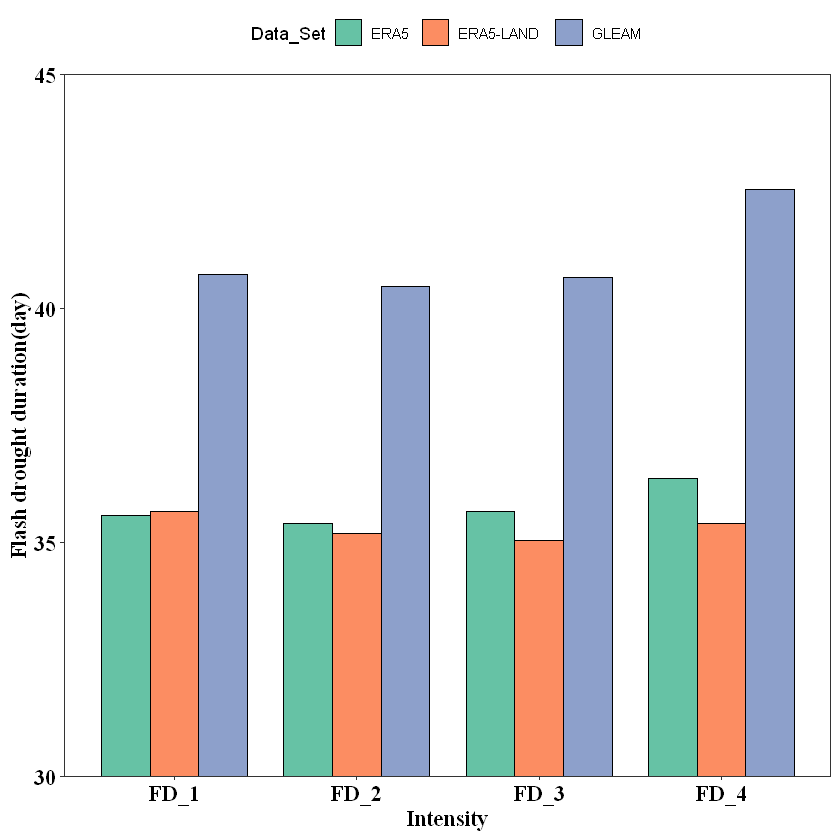

In [43]:
data=data1[which(data1$KIND=="intensity"),]
order_pet <- with(data,reorder(kind,duration,median))  #重新排序
order_pet <- factor(order_pet,levels =c(intensity))
fontsize=13
library(ggplot2)
library(RColorBrewer)
p1=ggplot(data,aes(x=order_pet,y=duration,fill=Data_Set))+###aes(fill=area),
  #geom_boxplot(aes(fill=lat),notch = F,varwidth = F,outlier.shape = NA)+
  geom_bar(position="dodge",stat = "identity",colour="black",width = 0.8)+
  scale_fill_manual(values = c(brewer.pal(4,"Set2")[c(1,2,3,4)]))+
  labs(y="Flash drought duration(day)",x="Intensity",family="serif")+
  coord_cartesian(ylim=c(30, 45))+
  theme_bw()+ 
  scale_y_continuous(expand = c(0,0))+
  guides(color=guide_legend(nrow=1, byrow=TRUE),size=(fontsize+4))+
  #geom_hline(aes(yintercept = 0),linetype = 'dashed',alpha = 0.5,lwd = 0.5,color = 'black')+
  #ggtitle(dname)+ 
  theme(legend.position ="top",
        plot.title=element_text(hjust=0.5,size=fontsize),
        axis.text = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
        axis.title = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
        #axis.title.x = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor=element_blank())
        
p1

In [44]:
pic_name=paste0("H:\\NO.1 flash drought\\5.小论文-骤旱\\论文大修12.2\\picture\\8.duration_")
pdf(paste0(pic_name,"bar_sea_int1.pdf"),width = 8, height = 6)
p1
dev.off()

png 
  2

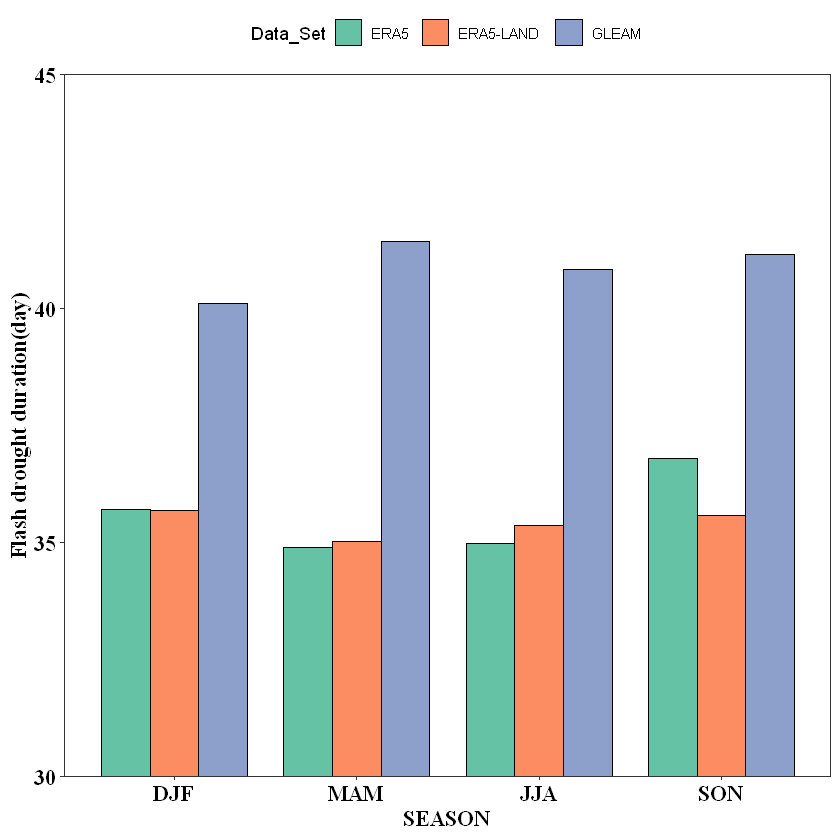

In [45]:
data=data1[which(data1$KIND=="season"),]
order_pet <- with(data,reorder(kind,duration,median))  #重新排序
order_pet <- factor(order_pet,levels =c(season))
fontsize=13
library(ggplot2)
library(RColorBrewer)
p2=ggplot(data,aes(x=order_pet,y=duration,fill=Data_Set))+###aes(fill=area),
  #geom_boxplot(aes(fill=lat),notch = F,varwidth = F,outlier.shape = NA)+
  geom_bar(position="dodge",stat = "identity",colour="black",width = 0.8)+
  scale_fill_manual(values = c(brewer.pal(4,"Set2")[c(1,2,3,4)]))+
  labs(y="Flash drought duration(day)",x="SEASON",family="serif")+
  coord_cartesian(ylim=c(30, 45))+
  theme_bw()+ 
  scale_y_continuous(expand = c(0,0))+
  guides(color=guide_legend(nrow=1, byrow=TRUE),size=(fontsize+4))+
  #geom_hline(aes(yintercept = 0),linetype = 'dashed',alpha = 0.5,lwd = 0.5,color = 'black')+
  #ggtitle(dname)+ 
  theme(legend.position ="top",
        plot.title=element_text(hjust=0.5,size=fontsize),
        axis.text = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
        axis.title = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
        #axis.title.x = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor=element_blank())
p2

In [46]:
pic_name=paste0("H:\\NO.1 flash drought\\5.小论文-骤旱\\论文大修12.2\\picture\\8.duration_")
pdf(paste0(pic_name,"bar_sea_int2.pdf"),width = 8, height = 6)
p2
dev.off()

png 
  2

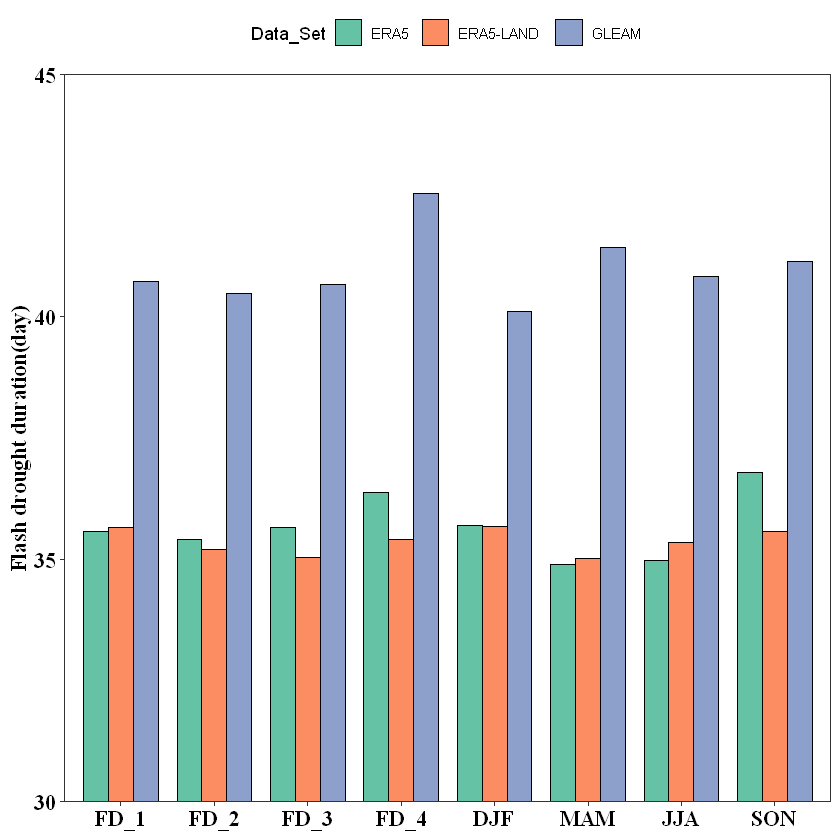

In [71]:
data=data[which(data$KIND=="intensity"),]
order_pet <- with(data,reorder(kind,duration,median))  #重新排序
order_pet <- factor(order_pet,levels =c(c(intensity),c(season)))
fontsize=13
library(ggplot2)
library(RColorBrewer)
p=ggplot(data,aes(x=order_pet,y=duration,fill=Data_Set))+###aes(fill=area),
  #geom_boxplot(aes(fill=lat),notch = F,varwidth = F,outlier.shape = NA)+
  geom_bar(position="dodge",stat = "identity",colour="black",width = 0.8)+
  scale_fill_manual(values = c(brewer.pal(4,"Set2")[c(1,2,3,4)]))+
  labs(y="Flash drought duration(day)",family="serif")+
  coord_cartesian(ylim=c(30, 45))+
  theme_bw()+ 
  scale_y_continuous(expand = c(0,0))+
  guides(color=guide_legend(nrow=1, byrow=TRUE),size=(fontsize+4))+
  #geom_hline(aes(yintercept = 0),linetype = 'dashed',alpha = 0.5,lwd = 0.5,color = 'black')+
  #ggtitle(dname)+ 
  theme(legend.position ="top",
        plot.title=element_text(hjust=0.5,size=fontsize),
        axis.text = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
        axis.title = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
        axis.title.x = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor=element_blank())
p

In [73]:
pic_name=paste0("H:\\NO.1 flash drought\\5.小论文-骤旱\\论文大修12.2\\picture\\8.duration_")
pdf(paste0(pic_name,"bar_sea_int.pdf"),width = 8, height = 6)
p
dev.off()

png 
  2

9.计算骤旱的季节和月份分配情况

In [1]:

data_set <- c("ERA5","GLEAM","ERA5-LAND")
sea_mon <- function(file_name,i){
#month_occ(file_name)
load(file_name)
data <- data_fd_total
aa <- data[data$month=="12"|data$month=="01"|data$month=="02",] #冬
bb <- data[data$month=="03"|data$month=="04"|data$month=="05",] #春
cc <- data[data$month=="06"|data$month=="07"|data$month=="08",] #夏
dd <- data[data$month=="09"|data$month=="10"|data$month=="11",] #秋

aa1 <- data[data$month=="01",] 
aa2 <- data[data$month=="02",] 
aa3 <- data[data$month=="03",] 
aa4 <- data[data$month=="04",] 
aa5 <- data[data$month=="05",] 
aa6 <- data[data$month=="06",] 
aa7 <- data[data$month=="07",] 
aa8 <- data[data$month=="08",] 
aa9 <- data[data$month=="09",] 
aa10 <- data[data$month=="10",] 
aa11 <- data[data$month=="11",] 
aa12 <- data[data$month=="12",] 

fd_season <- c(dim(aa)[1],dim(bb)[1],dim(cc)[1],dim(dd)[1])
season <- c("DJF","SON","JJA","MAM")
data_season <- data.frame(season,fd_season)
data_season$data_per <- (data_season$fd_season*100)/dim(data)[1]

fd_month <- c(dim(aa1)[1],dim(aa2)[1],dim(aa3)[1],dim(aa4)[1],dim(aa5)[1],dim(aa6)[1],dim(aa7)[1],dim(aa8)[1],
              dim(aa9)[1],dim(aa10)[1],dim(aa11)[1],dim(aa12)[1])
month <- seq(1,12,1)
data_month <- data.frame(month,fd_month)
data_month$data_per <- (data_month$fd_month*100)/dim(data)[1]

data_month$SET <- data_set[i]
data_season$SET <- data_set[i]

return(list(data_month,data_season))
}

file_name1 <- "H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\data_fd_total1.RData"
file_name2 <- "H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\data_fd_total1.RData"
file_name3 <-"H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\data_fd_total1.RData"

data1 <- sea_mon(file_name1,1)
data2 <- sea_mon(file_name2,2)
data3 <- sea_mon(file_name3,3)

data_month <- rbind(data1[[1]],data2[[1]],data3[[1]])
data_season <- rbind(data1[[2]],data2[[2]],data3[[2]])

data_month_avg <- (data1[[1]]$data_per+data2[[1]]$data_per+data3[[1]]$data_per)/3
data_season_avg <- (data1[[2]]$data_per+data2[[2]]$data_per+data3[[2]]$data_per)/3

data_season
data_season_avg

season,fd_season,data_per,SET
<chr>,<int>,<dbl>,<chr>
DJF,64903,26.99814,ERA5
SON,61536,25.59755,ERA5
JJA,53004,22.04844,ERA5
MAM,60955,25.35587,ERA5
DJF,81015,25.53399,GLEAM
SON,84911,26.76191,GLEAM
JJA,73392,23.13140,GLEAM
MAM,77965,24.57270,GLEAM
DJF,59231,26.19357,ERA5-LAND


In [6]:
data_season_avg

[1] 26.24190 26.12568 22.33532 25.29710

10.计算骤旱的季节性与强度的关系

In [3]:
sea_mon <- function(file_name,i){
#month_occ(file_name)
load(file_name)
data <- data_fd_total

I1 <- data[data$fd_intensity=="1",]
I2 <- data[data$fd_intensity=="2",]
I3 <- data[data$fd_intensity=="3",]
I4 <- data[data$fd_intensity=="4",]

season_fun <- function(data,j){
#data <- I2
aa <- data[data$month=="12"|data$month=="01"|data$month=="02",] #冬
bb <- data[data$month=="03"|data$month=="04"|data$month=="05",] #春
cc <- data[data$month=="06"|data$month=="07"|data$month=="08",] #夏
dd <- data[data$month=="09"|data$month=="10"|data$month=="11",] #秋

aa1 <- data[data$month=="01",] 
aa2 <- data[data$month=="02",] 
aa3 <- data[data$month=="03",] 
aa4 <- data[data$month=="04",] 
aa5 <- data[data$month=="05",] 
aa6 <- data[data$month=="06",] 
aa7 <- data[data$month=="07",] 
aa8 <- data[data$month=="08",] 
aa9 <- data[data$month=="09",] 
aa10 <- data[data$month=="10",] 
aa11 <- data[data$month=="11",] 
aa12 <- data[data$month=="12",] 

#强度
fd_intensity <- c(dim(I1)[1],dim(I2)[1],dim(I3)[1],dim(I4)[1])
intensity<- c("FD_1","FD_2",
                    "FD_3","FD_4")
data_intensity<- data.frame(intensity,fd_intensity)
data_intensity$data_per <- (data_intensity$fd_intensity*100)/dim(data_fd_total)[1]

#季节
fd_season <- c(dim(aa)[1],dim(bb)[1],dim(cc)[1],dim(dd)[1])
season <- c("DJF","MAM","JJA","SON")
data_season <- data.frame(season,fd_season)
data_season$data_per <- (data_season$fd_season/dim(data)[1])*data_intensity$data_per[j]

#月份
fd_month <- c(dim(aa1)[1],dim(aa2)[1],dim(aa3)[1],dim(aa4)[1],dim(aa5)[1],dim(aa6)[1],dim(aa7)[1],dim(aa8)[1],
              dim(aa9)[1],dim(aa10)[1],dim(aa11)[1],dim(aa12)[1])
month <- seq(1,12,1)
data_month <- data.frame(month,fd_month)
data_month$data_per <- (data_month$fd_month*100)/dim(data)[1]

data_month$SET <- data_set[i]
data_season$SET <- data_set[i]
data_season$degree <- intensity[j]

return(data_season)
}

IS1 <- season_fun(I1,1)
IS2 <- season_fun(I2,2)
IS3 <- season_fun(I3,3)
IS4 <- season_fun(I4,4)

IS <- rbind(IS1,IS2,IS3,IS4)

return(IS)
}

file_name1 <- "H:\\NO.1 flash drought\\03data\\ERA5\\2.fd_result\\data_fd_total1.RData"
file_name2 <- "H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\data_fd_total1.RData"
file_name3 <-"H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\data_fd_total1.RData"
data_set <- c("ERA5","GLEAM","ERA5-LAND")
#计算骤旱的强度占比（三套数据）
data1 <- sea_mon(file_name1,1)
data2 <- sea_mon(file_name2,2)
data3 <- sea_mon(file_name3,3)

data_avg <- (data1$data_per+data2$data_per+data3$data_per)/3  #三个数据的平均值
data <- data.frame(season=data1$season,degree=data1$degree,percentile=data_avg)

#data <- rbind(data1,data2,data3)  


In [4]:
data

season,degree,percentile
<chr>,<chr>,<dbl>
DJF,FD_1,11.996366
MAM,FD_1,11.549321
JJA,FD_1,10.169862
SON,FD_1,11.341107
DJF,FD_2,7.785910
MAM,FD_2,7.425634
JJA,FD_2,6.365809
SON,FD_2,7.317075
DJF,FD_3,4.104797


In [7]:
fun=function(data){
 library(plyr) 
ce <- ddply(data,"degree",transform,label_y=cumsum(percentile)-0.5*percentile)
ce$percentile <- round(ce$percentile,2)
fontsize=13
library(ggplot2)
library(RColorBrewer)
p=ggplot(ce,aes(x=degree,y=percentile,fill=season))+###aes(fill=area),
  #geom_boxplot(aes(fill=lat),notch = F,varwidth = F,outlier.shape = NA)+
  geom_bar(stat = "identity")+
  guides(fill=guide_legend(),family="serif")+
  scale_fill_manual(values = c(brewer.pal(4,"YlOrRd")[c(1,2,3,4)]))+#"Set3"
  labs(y="Proportion of flash drought (%)",x="Intensity")+
  coord_cartesian(ylim=c(0, 50))+
  theme_bw()+ 
  scale_y_continuous(expand = c(0,0))+
  #geom_hline(aes(yintercept = 0),linetype = 'dashed',alpha = 0.5,lwd = 0.5,color = 'black')+
  #ggtitle(dname)+ 
  geom_text(aes(y=label_y,label=percentile),colour="black",#vjust=1.5,
            size=5)+#position = position_dodge(.9),
  theme(legend.position = c(0.9,0.85),
        plot.title=element_text(hjust=0.5,size=fontsize),
        axis.text = element_text(colour='black',size=fontsize,hjust=.5,family="serif"),
        axis.title = element_text(colour='black',size=fontsize,hjust=.5,family="serif"),
        #axis.title.x = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor=element_blank())
return(p)
}

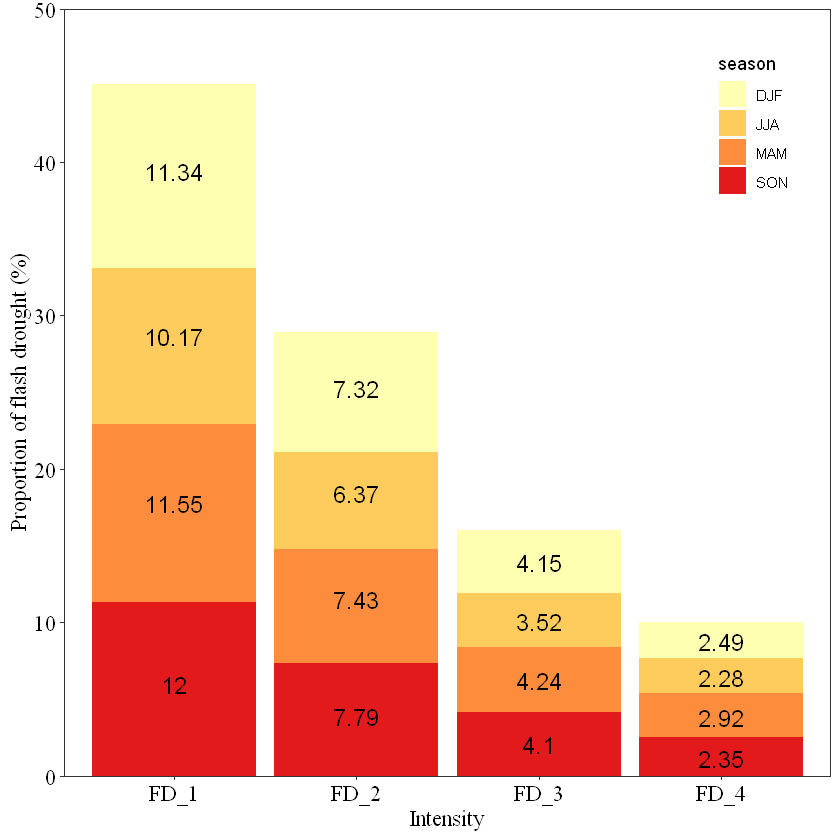

In [8]:
p4=fun(data)
p4

In [ ]:
data <- data.frame(season=data1$season,degree=data1$degree,percentile=data1$data_per)
p1=fun(data)
data <- data.frame(season=data1$season,degree=data1$degree,percentile=data2$data_per)
p2=fun(data)
data <- data.frame(season=data1$season,degree=data1$degree,percentile=data3$data_per)
p3=fun(data)

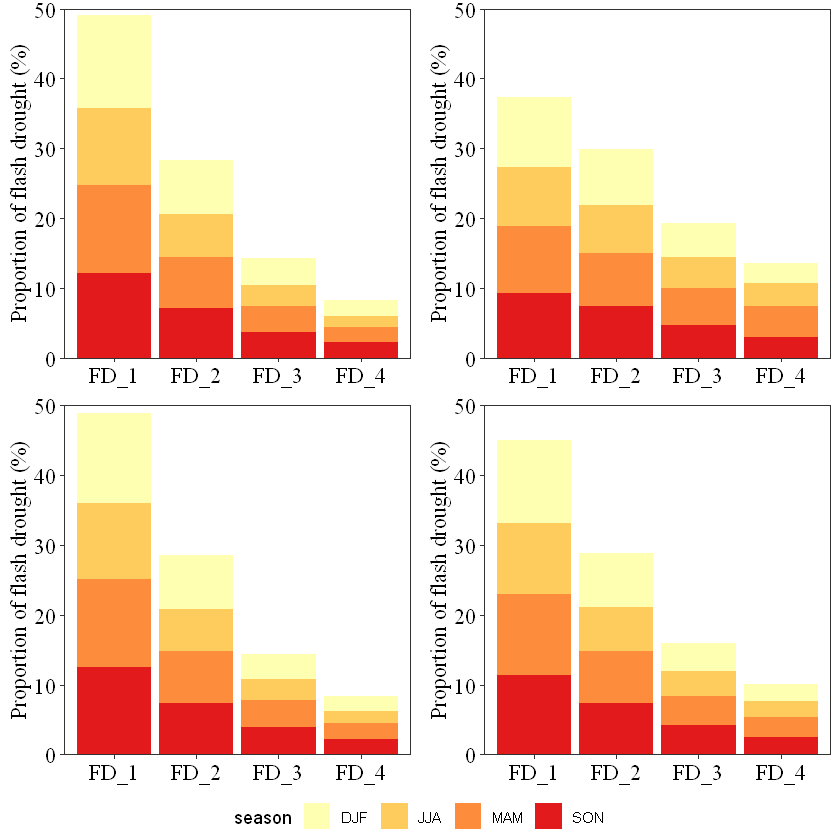

In [28]:
ggpubr::ggarrange(p1,p2,p3,p4,ncol = 2, nrow =2,common.legend = T,legend = "bottom") 

In [9]:
pic_name=paste0("H:\\NO.1 flash drought\\5.小论文-骤旱\\论文大修12.2\\picture\\7.bar_")
pdf(paste0(pic_name,"sea_int.pdf"),width = 8, height = 6)
p4 
dev.off()


png 
  2

11.计算季节的时间序列

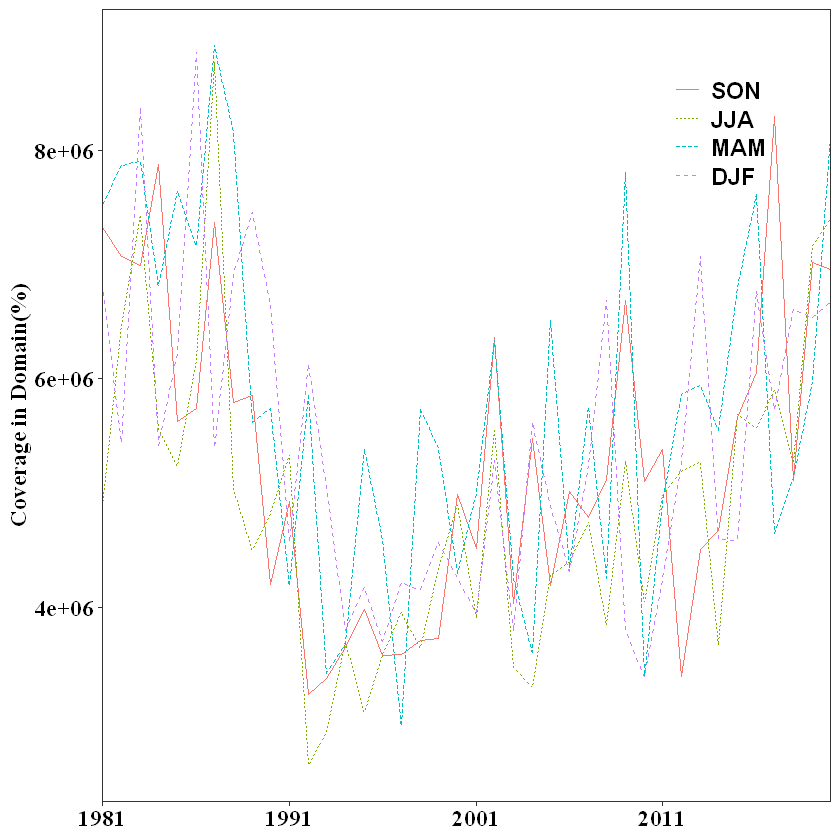

In [76]:
#file_name <- "H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\"
lonlat_name="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
file_name <- "H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\"
#area_change=function(file_name,lonlat_name,i){
  load(paste0(file_name,"data_fd_total1.RData"))
  load(lonlat_name)
  i=1
  load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\lon_lat_area.RData")  #0.5格点的面积
  
  #data <- dat[-which(dat$occ_number==0),]
  data1 <- merge(data_fd_total,lon_lat_area,by=c("lon","lat")) 
  #data1 <-data1[5000:6000,]
  data <- data1 
  aa <- data[data$month=="12"|data$month=="01"|data$month=="02",] #冬
  bb <- data[data$month=="03"|data$month=="04"|data$month=="05",] #春
  cc <- data[data$month=="06"|data$month=="07"|data$month=="08",] #夏
  dd <- data[data$month=="09"|data$month=="10"|data$month=="11",] #秋
  
 ee1 <- aggregate(aa$area,by=list(type=aa$occ_year),sum)
 ee2 <- aggregate(bb$area,by=list(type=bb$occ_year),sum)
 ee3 <- aggregate(cc$area,by=list(type=cc$occ_year),sum)
 ee4 <- aggregate(dd$area,by=list(type=dd$occ_year),sum)

 data2 <- data.frame(ee1,ee2[,2],ee3[,2],ee4[,2])
 names(data2) <- c("year","DJF","MAM","JJA","SON")
 data2$total <- rowSums(data2[,2:5])
 data2$DJF1 <- (data2[,2]*100)/data2[,6]
 data2$MAM1 <- (data2[,3]*100)/data2[,6]
 data2$JJA1 <- (data2[,4]*100)/data2[,6]
 data2$SON1 <- (data2[,5]*100)/data2[,6]

data3 <- data2[,c(1,2:5)]
data4 <- reshape2::melt(data3,measure.vars=c("SON","JJA","MAM","DJF"),
                        variable.name = "season",value.name = "value")

fontsize=14
library(ggplot2)
ggplot(data4,aes(x=year,y=value,colour=season,linetype=season))+
  #geom_point(pch=16,col="steelblue")+
  geom_line()+
 # geom_line(aes(x=year,y=pred[,"fit"]),lwd=1,col="steelblue")+
  # geom_line(aes(x=year,y=pred[,"lwr"]),lty=3)+
  # geom_line(aes(x=year,y=pred[,"upr"]),lty=3)+
  #geom_ribbon(aes(ymin=dat$msi,ymax=dat$msa),alpha=0.4,fill=blues9[3])+
  ylab("Coverage in Domain(%)")+
  #xlim(1980,2018)+ #xiugai
  #xlab("Year")+
  #guides(fill=F)+
  #ggtitle( "Spring")+    #
  #scale_fill_brewer(palette="Set3")+
  scale_x_continuous(breaks=seq(1981,2021,10),expand = c(0,0))+#这个可以去掉与Y轴间隙
  #scale_y_continuous(breaks=seq(-25,40,5),expand = c(0,1))+
  theme_bw()+
  theme(#axis.title.x = element_blank(),
    legend.position = c(0.85,0.85),
    legend.title = element_blank(),
    legend.text = element_text(face='bold',colour='black',size=fontsize,hjust=0),
    legend.background = element_rect(fill = 'transparent'),#, colour = 'black'
    axis.text = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
    axis.title.y = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
    axis.title.x = element_blank(),
    plot.title=element_text(hjust=0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

12.计算强度的时间序列

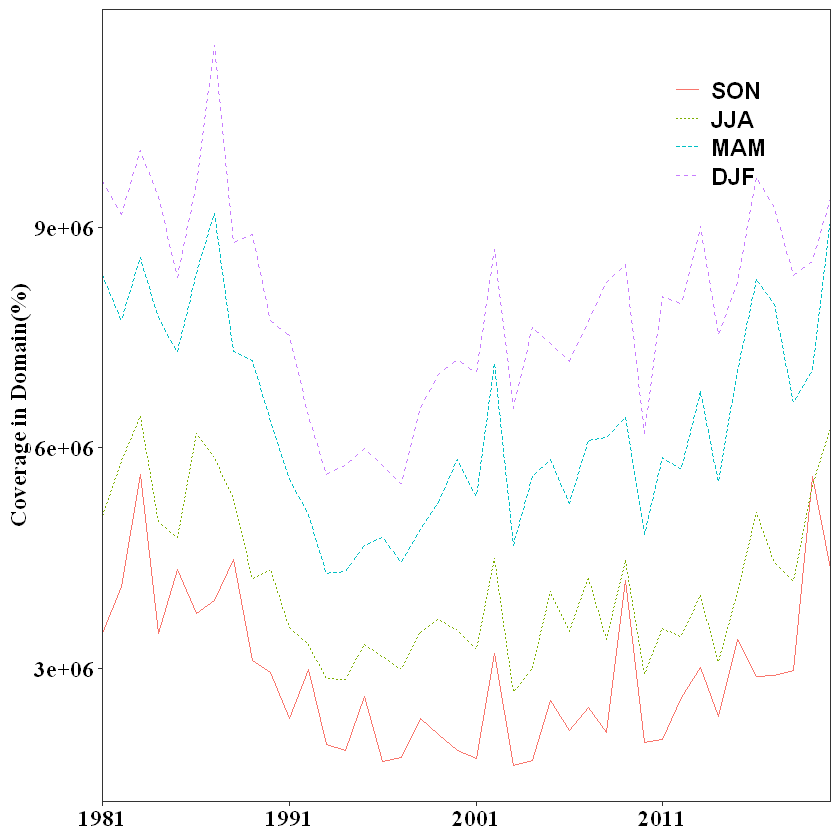

In [77]:
#file_name <- "H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\"
lonlat_name="H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\grid_lon_lat.RData"
file_name <- "H:\\NO.1 flash drought\\03data\\gleam_v3.5a\\6.GLEAM-0.5\\"
#area_change=function(file_name,lonlat_name,i){
  load(paste0(file_name,"data_fd_total1.RData"))
  load(lonlat_name)
  i=1
  load("H:\\NO.1 flash drought\\03data\\ERA5\\1.result\\lon_lat_area.RData")  #0.5格点的面积
  
  #data <- dat[-which(dat$occ_number==0),]
  data1 <- merge(data_fd_total,lon_lat_area,by=c("lon","lat")) 
  #data1 <-data1[5000:6000,]
  data <- data1 
  I1 <- data[data$fd_intensity=="1",]
  I2 <- data[data$fd_intensity=="2",]
  I3 <- data[data$fd_intensity=="3",]
  I4 <- data[data$fd_intensity=="4",]
  
  
 ee1 <- aggregate(I1$area,by=list(type=I1$occ_year),sum)
 ee2 <- aggregate(I2$area,by=list(type=I2$occ_year),sum)
 ee3 <- aggregate(I3$area,by=list(type=I3$occ_year),sum)
 ee4 <- aggregate(I4$area,by=list(type=I4$occ_year),sum)

 data2 <- data.frame(ee1,ee2[,2],ee3[,2],ee4[,2])
 names(data2) <- c("year","DJF","MAM","JJA","SON")
 data2$total <- rowSums(data2[,2:5])
 data2$DJF1 <- (data2[,2]*100)/data2[,6]
 data2$MAM1 <- (data2[,3]*100)/data2[,6]
 data2$JJA1 <- (data2[,4]*100)/data2[,6]
 data2$SON1 <- (data2[,5]*100)/data2[,6]

data3 <- data2[,c(1,2:5)]
data4 <- reshape2::melt(data3,measure.vars=c("SON","JJA","MAM","DJF"),
                        variable.name = "season",value.name = "value")

fontsize=14
library(ggplot2)
ggplot(data4,aes(x=year,y=value,colour=season,linetype=season))+
  #geom_point(pch=16,col="steelblue")+
  geom_line()+
 # geom_line(aes(x=year,y=pred[,"fit"]),lwd=1,col="steelblue")+
  # geom_line(aes(x=year,y=pred[,"lwr"]),lty=3)+
  # geom_line(aes(x=year,y=pred[,"upr"]),lty=3)+
  #geom_ribbon(aes(ymin=dat$msi,ymax=dat$msa),alpha=0.4,fill=blues9[3])+
  ylab("Coverage in Domain(%)")+
  #xlim(1980,2018)+ #xiugai
  #xlab("Year")+
  #guides(fill=F)+
  #ggtitle( "Spring")+    #
  #scale_fill_brewer(palette="Set3")+
  scale_x_continuous(breaks=seq(1981,2021,10),expand = c(0,0))+#这个可以去掉与Y轴间隙
  #scale_y_continuous(breaks=seq(-25,40,5),expand = c(0,1))+
  theme_bw()+
  theme(#axis.title.x = element_blank(),
    legend.position = c(0.85,0.85),
    legend.title = element_blank(),
    legend.text = element_text(face='bold',colour='black',size=fontsize,hjust=0),
    legend.background = element_rect(fill = 'transparent'),#, colour = 'black'
    axis.text = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
    axis.title.y = element_text(face='bold',colour='black',size=fontsize,hjust=.5,family="serif"),
    axis.title.x = element_blank(),
    plot.title=element_text(hjust=0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )





